In [1]:
import nldi_xstool

In [58]:


%matplotlib inline
from nldi_xstool.XSGen import XSGen
from nldi_xstool.ancillary import query_dems_bbox
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataretrieval.nwis as nwis
#try:
#    from nldi_xstool.__openChannel import flowEst
#except ImportError:
#    from .__openChannel import flowEst



In [59]:
# https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=11114495

gagebasin = NLDI().get_basins("11114495").to_crs('epsg:3857')

In [60]:
gageloc = NLDI().getfeature_byid("nwissite", "USGS-11114495").to_crs('epsg:3857')


<AxesSubplot:>

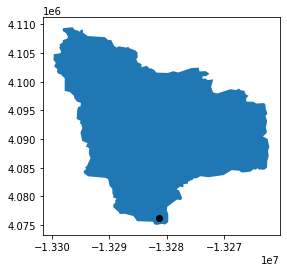

In [61]:
ax = plt.subplot(111)
gagebasin.plot(ax=ax)
gageloc.plot(ax=ax, color='black')

In [62]:
gagebasin = NLDI().get_basins("11114495").to_crs('epsg:3857')
gageloc = NLDI().getfeature_byid("nwissite", "USGS-11114495").to_crs('epsg:3857')
cid = gageloc.comid.values.astype(str)
print(cid,gageloc.comid.values.astype(int)[0], cid[0]) 
# strmseg_basin = NLDI().getfeature_byid("comid", cid[0], basin=True).to_crs('epsg:3857')
strmseg_loc = NLDI().getfeature_byid("comid", cid[0]).to_crs('epsg:3857')

['948070372'] 948070372 948070372


In [63]:

gageloc


,,geometry,type,source,sourceName,identifier,name,uri,comid,reachcode,measure,navigation
USGS-11118500,0,POINT (-13281355.523 4076195.242),hydrolocation,nwissite,NWIS Surface Water Sites,USGS-11118500,VENTURA R NR VENTURA,https://waterdata.usgs.gov/monitoring-location...,948070372,18070101000021,87.5400930347,https://labs.waterdata.usgs.gov/api/nldi/linke...


In [64]:
strmseg_loc

,,geometry,type,source,sourceName,identifier,name,uri,comid,navigation
948070372,0,"LINESTRING (-13281552.826 4076513.599, -132814...",,comid,NHDPlus comid,948070372,,,948070372,https://labs.waterdata.usgs.gov/api/nldi/linke...


In [65]:


len(strmseg_loc.geometry[0].coords)



11

11


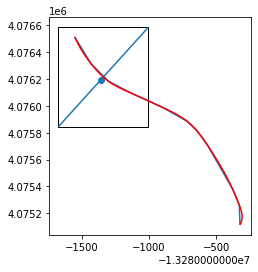

In [66]:



# print(geomfeat.head(), geom2afeat.head())
xs = XSGen(point=gageloc, cl_geom=strmseg_loc, ny=101, width=1000, tension=0.5)
xs_line = xs.get_xs()
ax = plt.subplot(111)
gageloc.plot(ax=ax)
strmseg_loc.plot(ax=ax)
xs_line.plot(ax=ax)
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
plt.show()



In [67]:


print(type(xs_line.envelope.bounds))
print(xs_line.envelope.bounds)
print(strmseg_loc.to_crs('epsg:4326'))



<class 'pandas.core.frame.DataFrame'>
           minx          miny          maxx          maxy
0 -1.328167e+07  4.075844e+06 -1.328100e+07  4.076585e+06
                                                      geometry type source  \
948070372 0  LINESTRING (-119.31022 34.35458, -119.30912 34...       comid   

                sourceName identifier name uri      comid  \
948070372 0  NHDPlus comid  948070372           948070372   

                                                    navigation  
948070372 0  https://labs.waterdata.usgs.gov/api/nldi/linke...  


In [68]:


xs_line_geom = xs_line.to_crs('epsg:4326')
print(xs_line_geom)
bbox = xs_line_geom.geometry[0].envelope.bounds
print(bbox)
query = query_dems_bbox(bbox)
print(query)



            name                                           geometry
0  cross-section  LINESTRING (-119.31131 34.34961, -119.31125 34...
(-119.31131466589494, 34.349612807102275, -119.30528785551348, 34.35511236648751)
{'res_1m': True, 'res_3m': False, 'res_5m': False, 'res_10m': True, 'res_30m': True, 'res_60m': False}


In [69]:


bbox = xs_line.geometry[0].bounds



In [70]:


width = abs(bbox[0]-bbox[2])
height = abs(bbox[1]-bbox[3])
print(width, height)



670.9014627709985 741.5465105129406


In [71]:


bb = xs_line.buffer(100)
bb.geometry[0].bounds



(-13281774.678342119,
 4075743.765710426,
 -13280904.009162027,
 4076685.0799382576)

In [72]:


bb1 = (xs_line.total_bounds) - ((100., 100., -100., -100.))
tuple(bb1)



(-13281774.794483459,
 4075743.6495690853,
 -13280903.893020688,
 4076685.1960795983)

            name                                           geometry
0  cross-section  LINESTRING (-13281674.794 4075843.650, -132816...


(-13281774.794483457,
 -13280232.886198869,
 4075035.039098223,
 4076685.1960795983)

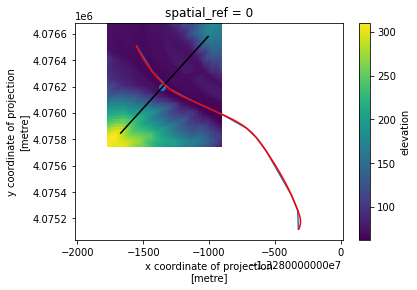

In [73]:


#Buffer bounding box of cross-section otherwise interpolation with elevation below returns nans near end points
xs_line_geom = xs_line.to_crs('epsg:3857')
print(xs_line_geom)
t1 = (xs_line_geom.total_bounds) + ((-100.,-100.,100., 100.))
dem = py3dep.get_map("DEM", tuple(t1), resolution=10, geo_crs="EPSG:3857", crs="epsg:3857")

ax = plt.subplot(111)
strmseg_loc.plot(ax=ax)
xs_line_geom.plot(ax=ax, colors='black')
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
dem.plot(ax=ax)
gageloc.plot(ax=ax)
ax.axis('equal')
# plt.tight_layout()



<class 'xarray.core.dataarray.DataArray'>


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

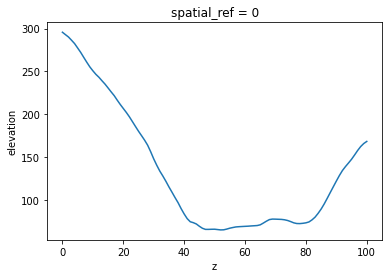

In [74]:


x,y = xs.get_xs_points()
dsx = xr.DataArray(x, dims='z')
dsy = xr.DataArray(y, dims='z')
dsi = dem.interp(x=('z',x), y=('z',y))
dsi.plot()
print(type(dsi))



In [75]:


pdsi = dsi.to_dataframe()
x = dsi.coords['x'].values -dsi.coords['x'].values[0]
y = dsi.coords['y'].values -dsi.coords['y'].values[0]
dist = np.hypot(x,y)
print(dist)
pdsi['distance'] = dist
pdsi



[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000.]


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

,spatial_ref,x,y,elevation,distance
z,,,,,
0,0,-1.328167e+07,4.075844e+06,295.673508,0.0
1,0,-1.328167e+07,4.075851e+06,292.855710,10.0
2,0,-1.328166e+07,4.075858e+06,290.090066,20.0
3,0,-1.328165e+07,4.075866e+06,286.323602,30.0
4,0,-1.328165e+07,4.075873e+06,282.412893,40.0
...,...,...,...,...,...
96,0,-1.328103e+07,4.076556e+06,152.431083,960.0
97,0,-1.328102e+07,4.076563e+06,157.651282,970.0
98,0,-1.328102e+07,4.076570e+06,162.253958,980.0


In [76]:
values = dsi.values
lmi = np.where(values == max(values[:49]))[0][0]
rmi = np.where(values == max(values[50:]))[0][0]
print(lmi,rmi, values[lmi], values[rmi])

0 100 295.67350768846586 168.22117960000784


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

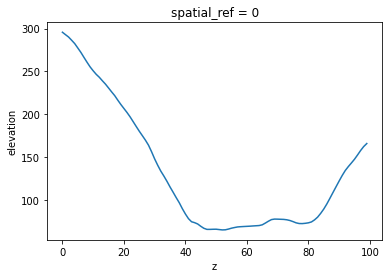

In [77]:
dsi[lmi:rmi].plot()

In [78]:
x = dsi.coords['x'].values[lmi:rmi] -dsi.coords['x'].values[lmi]
y = dsi.coords['y'].values[lmi:rmi] -dsi.coords['y'].values[lmi]
dist = np.hypot(x,y)
elev = dsi.values[lmi:rmi]
tlen = len(dist)
# print(tlen)
sta2 = np.zeros((tlen,2))
t = []
for index,(tx,ty) in enumerate(zip(dist,elev)):
    if not np.isnan(ty):
        a = np.array((tx,ty))
        sta2[index] = a
#         print(a)
    else:
        t.append(index)

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo